In [2]:
import pandas as pd
import numpy as np

In [3]:
# import the RPPA dataset
# clean the RPPA dataset by listing p-SHP2 levels of patients
rppa = pd.read_csv("RPPA2.csv")
rppa = rppa.transpose()
rppa = rppa.drop("Unnamed: 0")
rppa.columns=rppa.iloc[0]
rppa = rppa.drop("Composite.Element.REF")
rppa.index = [x.lower() for x in rppa.index]
rppa.index.rename("cell_type", inplace=True)
sub=rppa[["PTPN11|SHP-2_pY542","FN1|Fibronectin"]]
sub=sub.astype(float)
sub

Composite.Element.REF,PTPN11|SHP-2_pY542,FN1|Fibronectin
cell_type,,
tcga.3c.aali.01a.21.a43f.20,-0.521618,1.937218
tcga.3c.aalk.01a.21.a43f.20,-0.526931,0.242808
tcga.4h.aaak.01a.21.a43f.20,-0.370444,1.726744
tcga.5l.aat1.01a.21.a43f.20,-0.328153,-0.166293
tcga.5t.a9qa.01a.21.a43f.20,-0.701329,-0.906289
...,...,...
tcga.wt.ab41.01a.21.a43f.20,-0.177261,-0.052281
tcga.xx.a899.11a.51.a43o.20,-0.128184,0.532260
tcga.xx.a899.01a.21.a43f.20,-0.071370,-0.379777


In [4]:
# import the TIMER results from the R code 1.
timer = pd.read_csv("result_TIMER.csv", index_col="cell_type").drop("Unnamed: 0",1).transpose().astype(float)
timer

C:\Users\hchen\AppData\Local\Temp/ipykernel_11488/3370694748.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  timer = pd.read_csv("result_TIMER.csv", index_col="cell_type").drop("Unnamed: 0",1).transpose().astype(float)


cell_type,B cell,T cell CD4+,T cell CD8+,Neutrophil,Macrophage,Myeloid dendritic cell
tcga.bh.a0ea.01a.21.a13c.20,0.096362,0.129721,0.193481,0.119155,0.058444,0.500642
tcga.bh.a18h.01a.21.a13f.20,0.074215,0.095653,0.310345,0.138728,0.036745,0.555529
tcga.c8.a1hl.01a.21.a17j.20,0.084395,0.128481,0.189425,0.120107,0.073548,0.478896
tcga.d8.a146.01a.21.a13d.20,0.101727,0.126115,0.187512,0.125279,0.066884,0.488994
tcga.e2.a158.01a.21.a13e.20,0.119532,0.121591,0.187207,0.102299,0.036454,0.480965
...,...,...,...,...,...,...
tcga.e2.a1b1.01a.11.a13e.20,0.074222,0.123345,0.238278,0.134835,0.065683,0.543315
tcga.e2.a1b4.01a.21.a13e.20,0.103171,0.130624,0.184840,0.104060,0.070021,0.468087
tcga.e2.a1b5.01a.31.a13e.20,0.140516,0.191652,0.284384,0.135472,0.005206,0.555332
tcga.e2.a1b6.01a.21.a13e.20,0.127157,0.162572,0.287515,0.128154,0.037315,0.558682


In [5]:
#merge the TIMER results with RPPA dataset
res=timer.merge(sub,how='inner',left_index=True, right_index=True).astype(float)
res

,B cell,T cell CD4+,T cell CD8+,Neutrophil,Macrophage,Myeloid dendritic cell,PTPN11|SHP-2_pY542,FN1|Fibronectin
tcga.bh.a0ea.01a.21.a13c.20,0.096362,0.129721,0.193481,0.119155,0.058444,0.500642,0.171237,1.022859
tcga.bh.a18h.01a.21.a13f.20,0.074215,0.095653,0.310345,0.138728,0.036745,0.555529,-0.130730,-0.451199
tcga.c8.a1hl.01a.21.a17j.20,0.084395,0.128481,0.189425,0.120107,0.073548,0.478896,-0.329654,-0.602501
tcga.d8.a146.01a.21.a13d.20,0.101727,0.126115,0.187512,0.125279,0.066884,0.488994,0.084902,0.101375
tcga.e2.a158.01a.21.a13e.20,0.119532,0.121591,0.187207,0.102299,0.036454,0.480965,0.401267,-1.358473
...,...,...,...,...,...,...,...,...
tcga.e2.a1b1.01a.11.a13e.20,0.074222,0.123345,0.238278,0.134835,0.065683,0.543315,-0.040056,0.758293
tcga.e2.a1b4.01a.21.a13e.20,0.103171,0.130624,0.184840,0.104060,0.070021,0.468087,-0.131655,0.278222
tcga.e2.a1b5.01a.31.a13e.20,0.140516,0.191652,0.284384,0.135472,0.005206,0.555332,-0.323479,-1.733666
tcga.e2.a1b6.01a.21.a13e.20,0.127157,0.162572,0.287515,0.128154,0.037315,0.558682,-0.322786,-1.298980


Text(0, 0.5, 'p-SHP2 (Y542) Level')

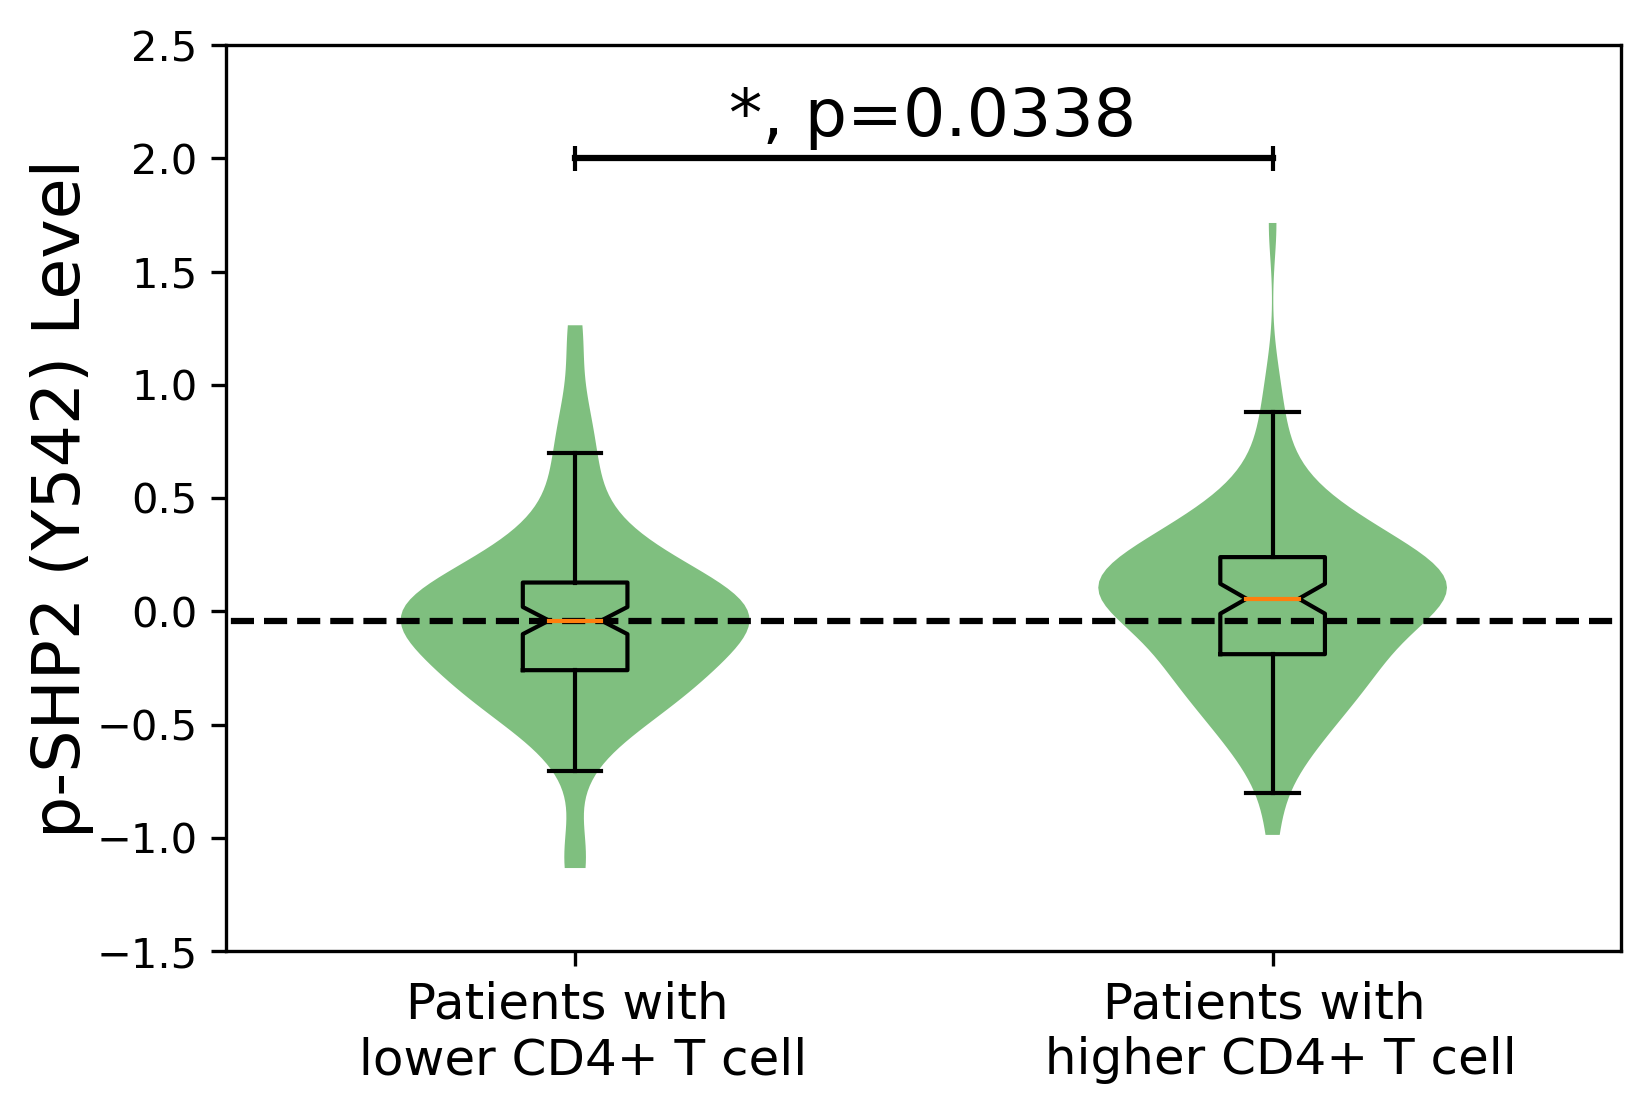

In [7]:
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
# plot the viloin plot of immune scores in differential p-SHP2 patient groups. 
div = np.median(res["T cell CD4+"])
res2_high = res.where(res["T cell CD4+"]>=div).dropna()
res2_low = res.where(res["T cell CD4+"]<div).dropna()
res2_low=res2_low.astype(float)
res2_high=res2_high.astype(float)
data_to_plot=[res2_low["PTPN11|SHP-2_pY542"],res2_high["PTPN11|SHP-2_pY542"]]
data_to_plot
plt.figure(dpi=300)
fig=plt.violinplot(data_to_plot,[1,2],showmeans=False, showextrema=False)
for pc in fig['bodies']:
    pc.set_facecolor('green')
    pc.set_alpha(0.5)
plt.boxplot(data_to_plot, notch=True, sym="",whis=1.5)
plt.plot([1,2],[2,2],"-|", color="black")
plt.plot([0,4],[np.median(res2_low["PTPN11|SHP-2_pY542"]),np.median(res2_low["PTPN11|SHP-2_pY542"])],"--", color="black")
plt.xlim((0.5,2.5))
plt.ylim((-1.5,2.5))
plt.gca().annotate('*, p=0.0338',
            xy=(1.5, 2), xycoords='data',
            xytext=(0.36, 0.9), textcoords='axes fraction',fontsize =16)
#plt.gca().axes.get_xaxis().set_visible(False)
my_xticks = ['Patients with \n lower CD4+ T cell',"Patients with \n higher CD4+ T cell"]
plt.xticks([1,2], my_xticks,fontsize=12)
plt.ylabel("p-SHP2 (Y542) Level",labelpad=0.5,fontsize=16)

In [8]:
# import the mRNA dataset
mRNA=pd.read_csv("mRNA_PRRA_merged.csv")
mRNA["index"]=[x.replace("-",".") for x in mRNA["Composite.Element.REF"]]
mRNA=mRNA.set_index("index")
mRNA_sub=mRNA[["PTPN11","PTPN1"]]
mRNA_sub

,PTPN11,PTPN1
index,,
tcga.bh.a0ea.01a.21.a13c.20,0.225429,0.09950
tcga.bh.a18h.01a.21.a13f.20,-0.083571,0.84250
tcga.c8.a1hl.01a.21.a17j.20,-1.137500,-1.16050
tcga.d8.a146.01a.21.a13d.20,-0.280714,0.21775
tcga.e2.a158.01a.21.a13e.20,0.422286,-0.94200
...,...,...
tcga.e2.a1b1.01a.11.a13e.20,-0.684071,-0.54025
tcga.e2.a1b4.01a.21.a13e.20,-0.411714,0.26150
tcga.e2.a1b5.01a.31.a13e.20,-0.026429,0.12600


In [9]:
# merge the TIMER dataset with mRNA dataset
res=timer.merge(mRNA_sub,how='inner',left_index=True, right_index=True)
res

,B cell,T cell CD4+,T cell CD8+,Neutrophil,Macrophage,Myeloid dendritic cell,PTPN11,PTPN1
tcga.bh.a0ea.01a.21.a13c.20,0.096362,0.129721,0.193481,0.119155,0.058444,0.500642,0.225429,0.09950
tcga.bh.a18h.01a.21.a13f.20,0.074215,0.095653,0.310345,0.138728,0.036745,0.555529,-0.083571,0.84250
tcga.c8.a1hl.01a.21.a17j.20,0.084395,0.128481,0.189425,0.120107,0.073548,0.478896,-1.137500,-1.16050
tcga.d8.a146.01a.21.a13d.20,0.101727,0.126115,0.187512,0.125279,0.066884,0.488994,-0.280714,0.21775
tcga.e2.a158.01a.21.a13e.20,0.119532,0.121591,0.187207,0.102299,0.036454,0.480965,0.422286,-0.94200
...,...,...,...,...,...,...,...,...
tcga.e2.a1b1.01a.11.a13e.20,0.074222,0.123345,0.238278,0.134835,0.065683,0.543315,-0.684071,-0.54025
tcga.e2.a1b4.01a.21.a13e.20,0.103171,0.130624,0.184840,0.104060,0.070021,0.468087,-0.411714,0.26150
tcga.e2.a1b5.01a.31.a13e.20,0.140516,0.191652,0.284384,0.135472,0.005206,0.555332,-0.026429,0.12600
tcga.e2.a1b6.01a.21.a13e.20,0.127157,0.162572,0.287515,0.128154,0.037315,0.558682,-0.442071,0.08625


Text(0, 0.5, 'SHP2 Level')

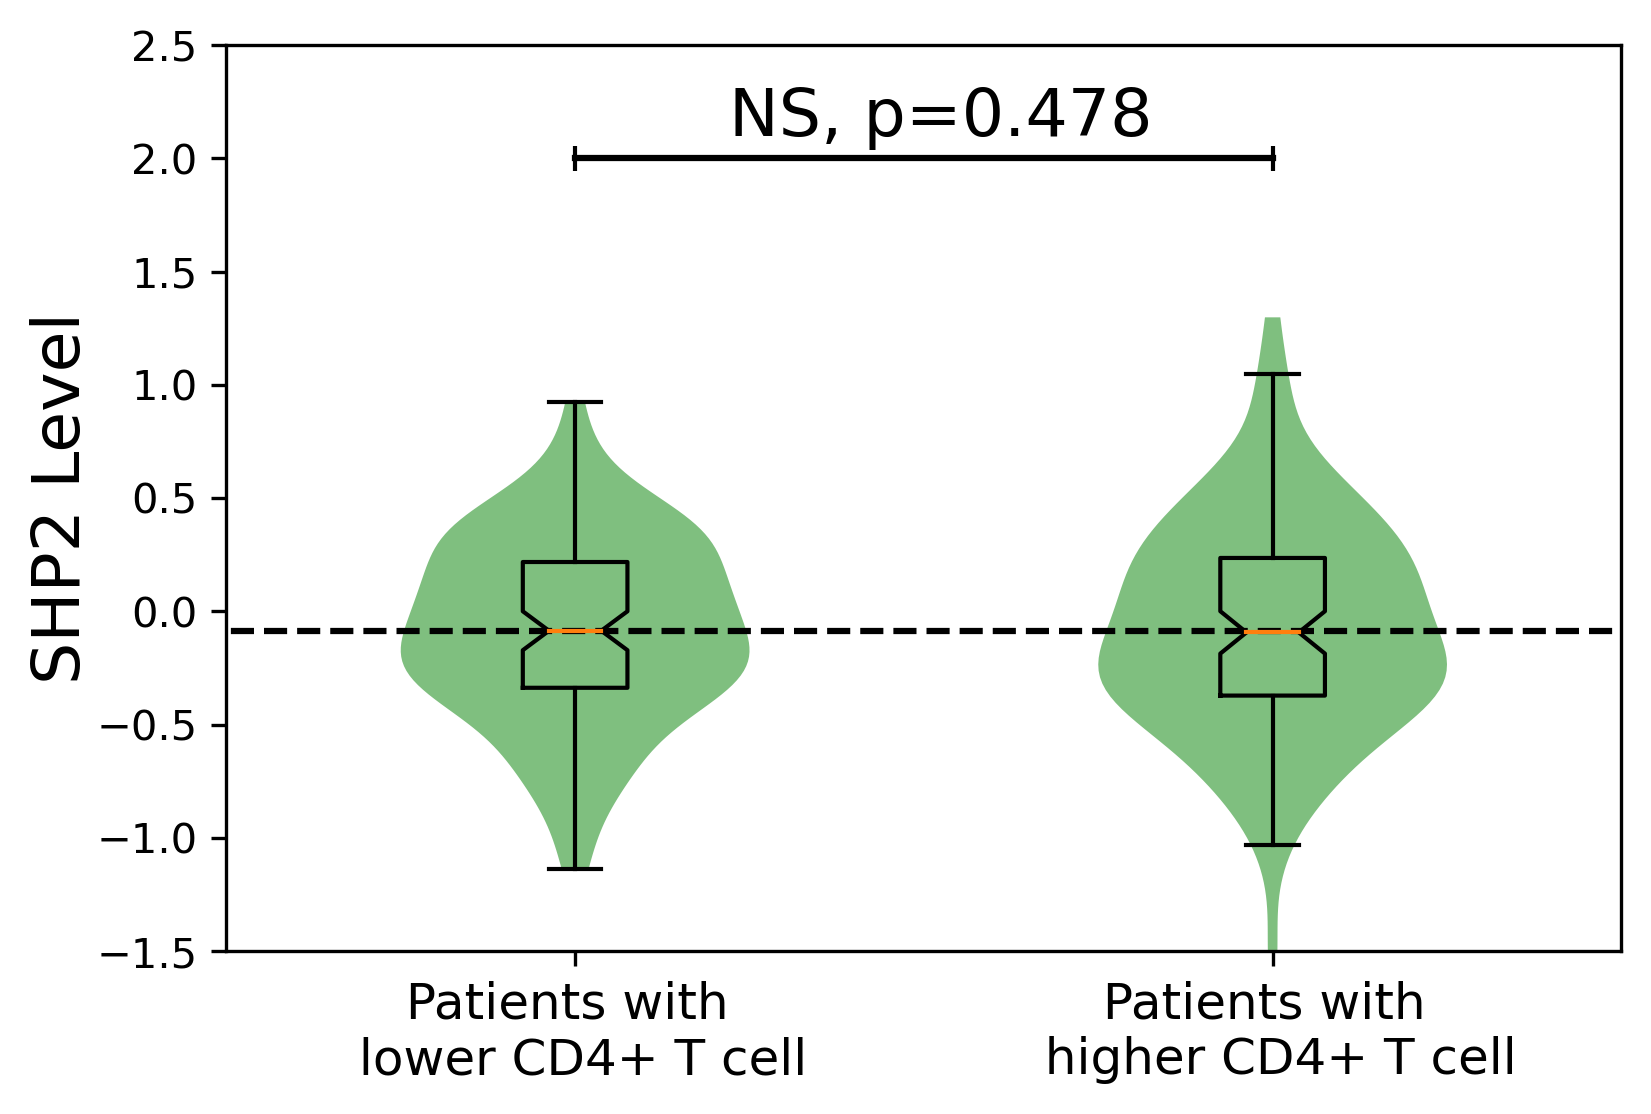

In [11]:
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
# plot the viloin plot of immune scores in differential SHP2 patient groups. 
div = np.median(res["T cell CD4+"])
res2_high = res.where(res["T cell CD4+"]>=div).dropna()
res2_low = res.where(res["T cell CD4+"]<div).dropna()
res2_low=res2_low.astype(float)
res2_high=res2_high.astype(float)
data_to_plot=[res2_low["PTPN11"],res2_high["PTPN11"]]
data_to_plot
plt.figure(dpi=300)
fig=plt.violinplot(data_to_plot,[1,2],showmeans=False, showextrema=False)
for pc in fig['bodies']:
    pc.set_facecolor('green')
    pc.set_alpha(0.5)
plt.boxplot(data_to_plot, notch=True, sym="",whis=1.5)
plt.plot([1,2],[2,2],"-|", color="black")
plt.plot([0,4],[np.median(res2_low["PTPN11"]),np.median(res2_low["PTPN11"])],"--", color="black")
plt.xlim((0.5,2.5))
plt.ylim((-1.5,2.5))
plt.gca().annotate('NS, p=0.478',
            xy=(1.5, 2), xycoords='data',
            xytext=(0.36, 0.9), textcoords='axes fraction',fontsize=16)
#plt.gca().axes.get_xaxis().set_visible(False)
my_xticks = ['Patients with \n lower CD4+ T cell',"Patients with \n higher CD4+ T cell"]
plt.xticks([1,2], my_xticks,fontsize=12)
plt.ylabel("SHP2 Level",labelpad=0.5,fontsize=16)